# GUIDE to Worksheet 1.3: Bayes' Theorem and the Effect of Priors

This notebook is meant to provide hints and guidance on how to complete *Worksheet 1.3: Bayes' Theorem and the Effect of Priors*.  It will not necessarily answer every part of every problem, but it will get you to the interesting points of the worksheet.

As a reminder, this worksheet is an introduction into how to use Bayes' theorem in Python and manipulate PDFs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as r
import scipy.stats as st
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [2]:
r.seed(42)

N_coins = 100
p_true = 0.4

coin_flips = np.random.rand(N_coins) < p_true
obs_heads = np.sum(coin_flips)

print(f"There were {obs_heads} heads observed in {N_coins} flips")

There were 46 heads observed in 100 flips


Bayes' Theorem states
$$
    P(A | B) = \frac{P(B|A)P(A)}{P(B)}.
$$
In terms of our problem, $B$ is the likelihood of $k=46$ heads and $A$ is the specific value of $p_{H}$, so we can write:
\begin{equation}
    P(p=p_H | k = 42) = \frac{P(k=42|p=p_H)P(p=p_H)}{P(k=42)}
\end{equation}
In our simulation, we know $k=42$ and the number of coins that we flipped but we maybe don't know $p_H$ the likelihood of a single coin being heads.

The area under the uniform prior before normalization is 0.005
The sum of the bin heights is 1

The area under the uniform prior after normalization is 1
The sum of the bin heights is 2e+02


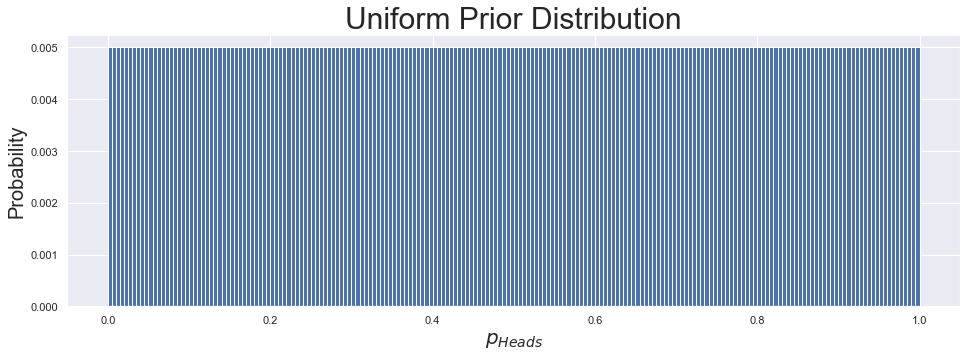

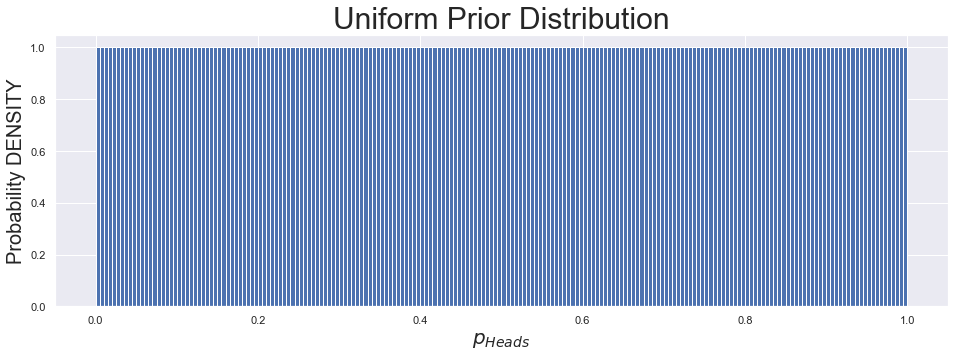

In [3]:
p_grid = np.linspace(0, 1, 201)

deltaX = np.mean(p_grid[1:] - p_grid[:-1])
p_grid = p_grid[:-1] + deltaX/2.

## If we have a uniform distribution, then the probability of being in
## any given bin in 'p_grid' is deltaX
prior_unif = np.ones_like(p_grid) * deltaX

fig, ax = plt.subplots(1, 1, figsize=(16, 5))

_ = ax.bar(p_grid, prior_unif, width=deltaX)

_ = ax.set_xlabel(r"$p_{Heads}$", fontsize=20)
_ = ax.set_ylabel("Probability", fontsize=20)
_ = ax.set_title(f"Uniform Prior Distribution", fontsize=30)

prior_area = np.sum(prior_unif * deltaX)
print(f"The area under the uniform prior before normalization is {prior_area:.2g}")
print(f"The sum of the bin heights is {np.sum(prior_unif):.2g}")

## It turns out that if we want *area* to correspond to probability, then
## we shouln't have multiplied by deltaX.
prior_unif_2 = prior_unif / deltaX

fig, ax = plt.subplots(1, 1, figsize=(16, 5))

_ = ax.bar(p_grid, prior_unif_2, width=deltaX)

_ = ax.set_xlabel(r"$p_{Heads}$", fontsize=20)
_ = ax.set_ylabel("Probability DENSITY", fontsize=20)
_ = ax.set_title(f"Uniform Prior Distribution", fontsize=30)

prior_area_2 = np.sum(prior_unif_2 * deltaX)
print(f"\nThe area under the uniform prior after normalization is {prior_area_2:.2g}")
print(f"The sum of the bin heights is {np.sum(prior_unif_2):.2g}")

Depending on how you want to use the heights of the bars, you may need probability density or probability.  In our case, we need *probabilities*, so we're going to use values such that the sum of the $y$-values is 1.

These plots represent the *prior* distribution, $P(A) = P(p=p_H)$ in the formula.

In [4]:
N_tosses = 5
k_obs = np.sum(coin_flips[:N_tosses])
print(f"In the first {N_tosses} flips, there were {k_obs} heads")


prob_of_obs = np.zeros_like(p_grid)

for ii, pH in enumerate(p_grid):
    prob_of_obs[ii] = st.binom.pmf(k_obs, N_tosses, pH)
    
likelihood_area = np.sum(prob_of_obs * deltaX)
print(f"\nThe area under the likelihood function before normalization is {likelihood_area:.4g}")
print(f"The sum of the bin heights is {np.sum(prob_of_obs):.4g}")
    
prob_of_obs_renorm = prob_of_obs / np.sum(prob_of_obs)

likelihood_area_renorm = np.sum(prob_of_obs_renorm * deltaX)
print(f"\nThe area under the likelihood function after normalization is {likelihood_area_renorm:.4g}")
print(f"The sum of the bin heights is {np.sum(prob_of_obs_renorm):.4g}")

In the first 5 flips, there were 2 heads

The area under the likelihood function before normalization is 0.1667
The sum of the bin heights is 33.33

The area under the likelihood function after normalization is 0.005
The sum of the bin heights is 1


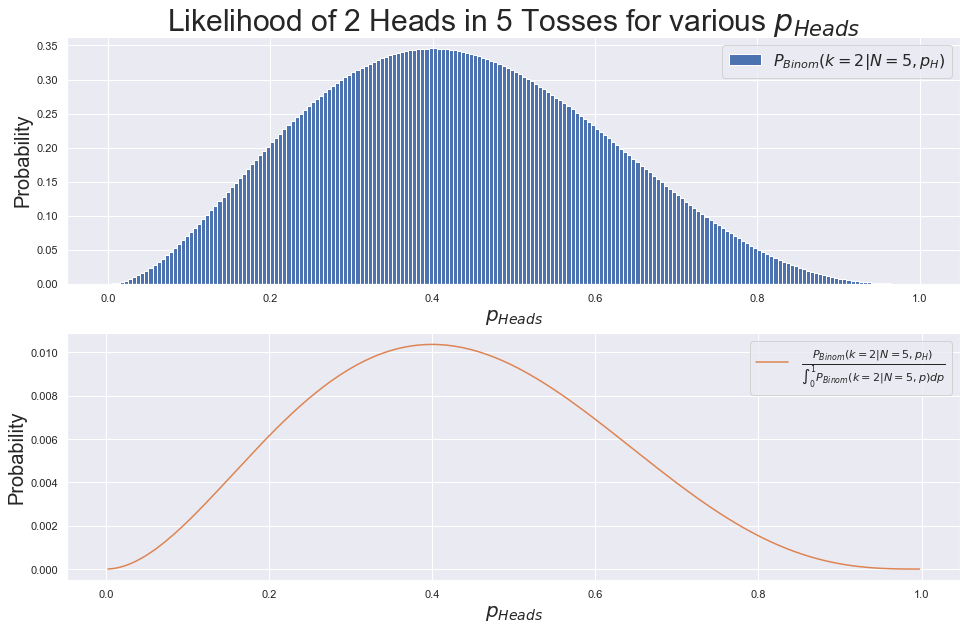

In [5]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 10))

_ = ax1.bar(p_grid, prob_of_obs, width=deltaX,
           label=r"$P_{Binom}(k=2|N=5, p_H)$")

_ = ax2.plot(p_grid, prob_of_obs_renorm, color="C1", 
            label=r"$\frac{P_{Binom}(k=2|N=5, p_H)}{\int_0^1 P_{Binom}(k=2|N=5, p) dp}$")

_ = ax1.set_xlabel(r"$p_{Heads}$", fontsize=20)
_ = ax1.set_ylabel("Probability", fontsize=20)
_ = ax1.legend(fontsize=16)

_ = ax1.set_title(f"Likelihood of {k_obs} Heads in {N_tosses} Tosses for"+
                 r" various $p_{Heads}$", fontsize=30)

_ = ax2.set_xlabel(r"$p_{Heads}$", fontsize=20)
_ = ax2.set_ylabel("Probability", fontsize=20)
_ = ax2.legend(fontsize=16)

However, this distribution, $P(k=2|N=5, p_{H})$ is not properly normalized: the probability of these outcomes sums to a value greater than 1.  To complete Bayes' Theorem, we're going to need to be careful about normalization.

For now, this isn't much of a problem because the $y$-axis quantity is useful and meaningful as is, but in general it may be useful to normalize by dividing by the sum of the $y$-values, as shown in orange above.  (Notice the different $y$-axis scale!)

------

Recall that Bayes' Theorem can be written (we can get rid of the constant denominator):

\[
    P(p=p_H | N=5, k = 2) \propto P(k=2 | N=5, p=p_H)\times P(p=p_H).
\]

That is, now that we have a likelihood function and a prior, we have enough information to use Bayes' Theorem to calculate our desired *posterior distribution*.  That is, the point of Bayes' Theorem is to estimate parameters given data, and this is what is represented in the LHS of the Theorem.  

In Python, the method then requires that we simply multiply the prior and the likelihood and normalize the result!

The sum of probabilities is 1.00


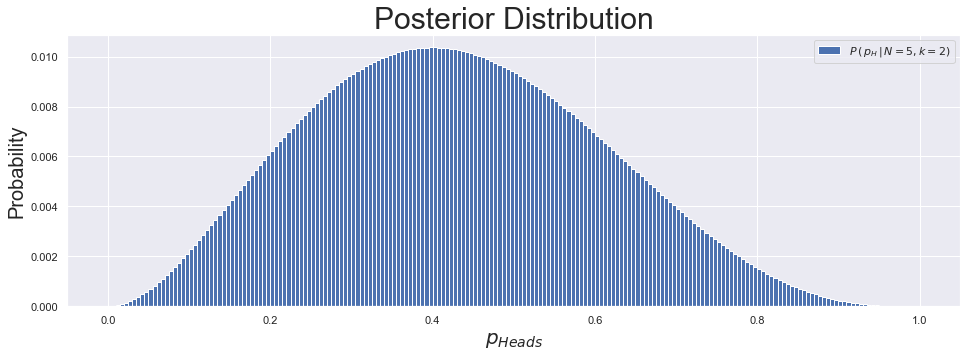

In [8]:
post_arr = prob_of_obs * prior_unif
post_arr = post_arr / np.sum(post_arr)

print(f"The sum of probabilities is {np.sum(post_arr):.2f}")

fig, ax = plt.subplots(1, 1, figsize=(16, 5))

_ = ax.bar(p_grid, post_arr, width=deltaX, label=r"$P\,(\,p_H\,|\,N=5, k=2)$")

_ = ax.set_xlabel(r"$p_{Heads}$", fontsize=20)
_ = ax.set_ylabel("Probability", fontsize=20)
_ = ax.set_title(f"Posterior Distribution", fontsize=30)
_ = ax.legend()


We can now use this to calculate meaningful quantities.  For example, we can get the expected value, variance, and percentiles of $p_H$, as shown below.

In [19]:
pH_exp_val = np.sum([pH*prob for (pH, prob) in zip(p_grid, post_arr)])

print(f"\nThe expected value of p_Heads is {pH_exp_val:.4g}")

pH_std_dev = np.sqrt(np.sum([prob * (pH-pH_exp_val)**2
                             for (pH, prob) in zip(p_grid, post_arr)]))

print(f"\nThe standard deviation of p_Heads is {pH_std_dev:.4g}")

post_CDF = np.cumsum(post_arr)
pH_median = p_grid[post_CDF > 0.5][0]
                     
print(f"\nThe median of p_Heads is {pH_median:.4g}")

a, b = 0.45, 0.55
good_idx = (a <= p_grid) & (p_grid <= b)
pH_in_a_b = np.sum(post_arr[good_idx])
print(f"\nThe probability that the coin is within 5% of 0.5 is {pH_in_a_b:.2%}")


The expected value of p_Heads is 0.4286

The standard deviation of p_Heads is 0.175

The median of p_Heads is 0.4225

The probability that the coin is within 5% of 0.5 is 18.63%


Now that you have this working, you should try things like changing the prior distribution or flipping more coins.  In particular, does the choice of prior matter if you have enough data?  What if you don't have enough data: how biased can your posterior become?